In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
# import librosa
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers


In [4]:

 # train_dir = r'C:\Users\lenovo\Desktop\Session 3\dogvscat\train1'
train_dir = '/content/drive/My Drive/Session 3/dogvscat/train1'

if not os.path.exists(train_dir):
    raise Exception(f'Directory {train_dir} does not exist')


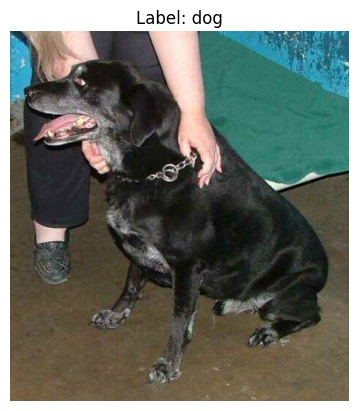

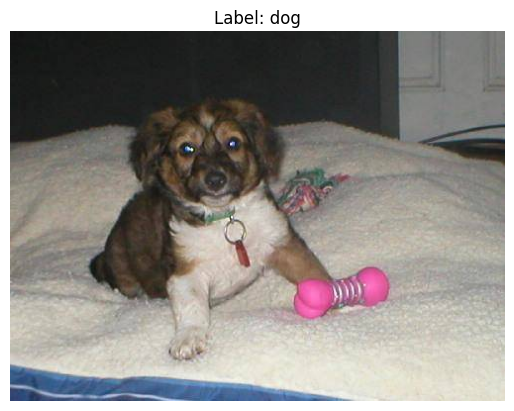

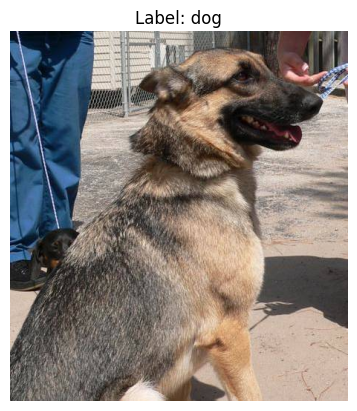

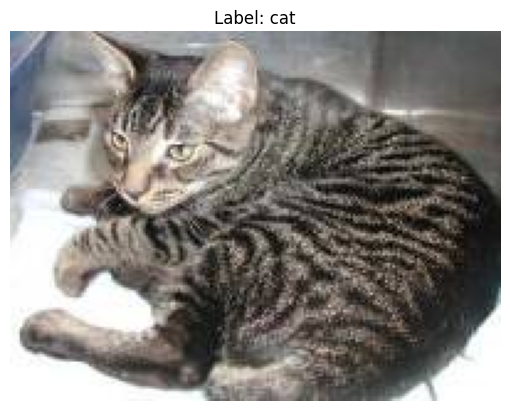

In [5]:

# List all the files in the train folder
files = os.listdir(train_dir)

# Display images with labels
for idx, file_name in enumerate(files):
    image_path = os.path.join(train_dir, file_name)

#     #Check if the file exists
#     if not os.path.exists(image_path):
#         print(f'File {image_path} not found.')
#         continue

    try:
        image = Image.open(image_path)
        label = 'cat' if 'cat' in file_name else 'dog'
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')  # Hide image axes
        plt.show()
    except Exception as e:
        print(f'Error opening {image_path}: {e}')

   # Show the first few photos
    if idx == 3:
        break


# Convert Image to npArray

In [6]:
data=[]
label=[]
e=0

for i in range(0,100):

  img=image.resize((250,250))
  img=np.array(img)
  data.append(img)
  if files[i][0:3] == 'dog':
    label.append(0)
  else: label.append(1)
print('Finish')

Finish



# One Hot Data

In [7]:
data=np.asarray(data)
label=np.asarray(label)
label=keras.utils.to_categorical(label,num_classes=2)

print(f'Data: {data.shape},\nLabel: {label.shape}')

Data: (100, 250, 250, 3),
Label: (100, 2)


In [8]:
cat , dog =0 ,0
for item in label:
  if item[0]==0:
    cat+=1
  else:
    dog+=1

print(f'Cat: {cat},\nDog: {dog}')

Cat: 43,
Dog: 57


# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data, label, test_size=0.25, random_state=42)
print(X_train.shape)

(75, 250, 250, 3)


# Model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

model = Sequential()

model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same', input_shape=(250, 250, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(256, (5, 5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(256, (1, 1), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(512, (1, 1), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (1, 1), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [11]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 125, 125, 128)       │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 125, 125, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 63, 63, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 63, 63, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 512)         │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     134,221,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,919,426 (545.19 MB)

 Trainable params: 142,919,426 (545.19 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
Hist=model.fit(X_train, y_train ,batch_size=100 ,epochs=5 ,validation_data=(X_test,y_test))

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 59s 59s/step - acc: 0.4933 - loss: 5.4905 - val_acc: 0.4000 - val_loss: 164.2373
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 82s 82s/step - acc: 0.4400 - loss: 152.4849 - val_acc: 0.4000 - val_loss: 13.3352
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 55s 55s/step - acc: 0.4400 - loss: 13.0503 - val_acc: 0.6000 - val_loss: 12.3888
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 83s 83s/step - acc: 0.5600 - loss: 14.0201 - val_acc: 0.6000 - val_loss: 4.9754
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step - acc: 0.5600 - loss: 6.6261 - val_acc: 0.4000 - val_loss: 3.0432


In [13]:
# Print a summary of the history of Train
Hist.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

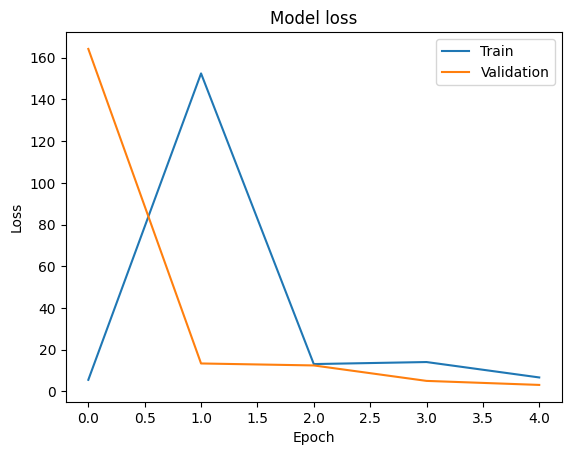

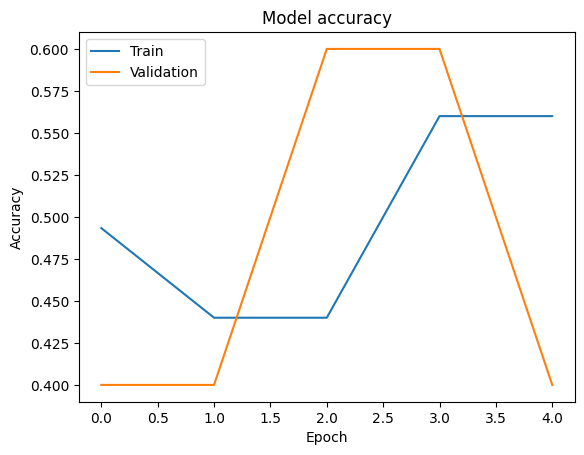

In [14]:
# Plot training & validation loss values
def plot_loss(Hist):
    plt.plot(Hist.history['loss'])
    plt.plot(Hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(Hist):
    plt.plot(Hist.history['acc'])
    plt.plot(Hist.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(Hist)
plot_accuracy(Hist)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


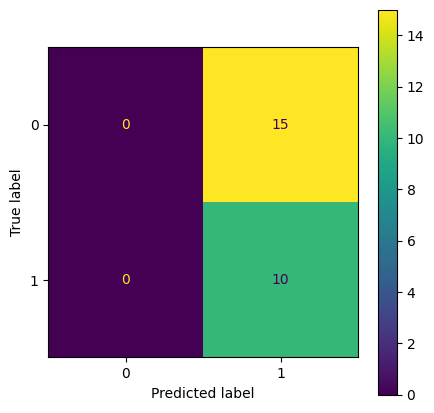

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax)
plt.show()
